In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#L1_rcus=range(16,96,8)
L1_rcus=range(96//2,96)
L1start=datetime.fromisoformat("2022-11-24 15:24:20")
L1sst_sec=10 #time for each sample
tstep_min=10;

L1_files='../menno/cs032/20221124_lba/20221124_152420'


In [3]:
navg=tstep_min*60//L1sst_sec #10 minutes
from sst_bst import LoadL1sst
D=[]
for rcu in L1_rcus:
    D1=LoadL1sst(L1_files,rcu)
    n1,n2=D1.shape
    n0=n1//navg
    D1=np.percentile(D1[:n0*navg].reshape([n0,navg,n2]),50,axis=1)
    D.append(D1)
D=np.array(D)
D=np.swapaxes(D,0,1)
print(D.shape)
print('hours=',D.shape[0]*tstep_min/60)
L1_hour=np.arange(D.shape[0])*tstep_min/60+(15+24/60+20/60/60-24)

../menno/cs032/20221124_lba/20221124_152420_sst_rcu048.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu049.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu050.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu051.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu052.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu053.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu054.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu055.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu056.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu057.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu058.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu059.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu060.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu061.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu062.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu063.dat
../menno/cs032/20221124_lba/20221124_152420_sst_rcu064.d

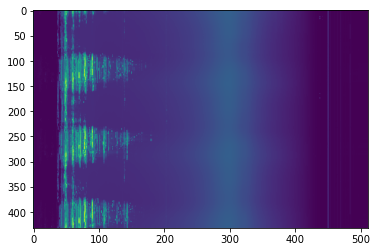

In [6]:
def P2dB(P): return 10*np.log10(P)
plt.imshow(P2dB(D[:,0,:]),aspect='auto')

In [7]:
sis=range(18); #signal inputs
START_TIME="2022-11-25 12:00:00"
END_TIME=  "2022-11-28 06:00:00"
tstep_min=10;
filename="LBA_%s_%imin.npy"%(START_TIME,tstep_min)
D2=np.load(filename)
print(D2.shape)
L2_hour=np.arange(D2.shape[0])/60*tstep_min+(12-24)


(396, 18, 512)


In [8]:
freqs=np.arange(512)/512*100
def Pnorm(P1):
    Pwr=10*np.log10(P1)
    Pwr-=np.mean(Pwr,axis=0)[np.newaxis,:]
    return Pwr


(0.0, 48.0)

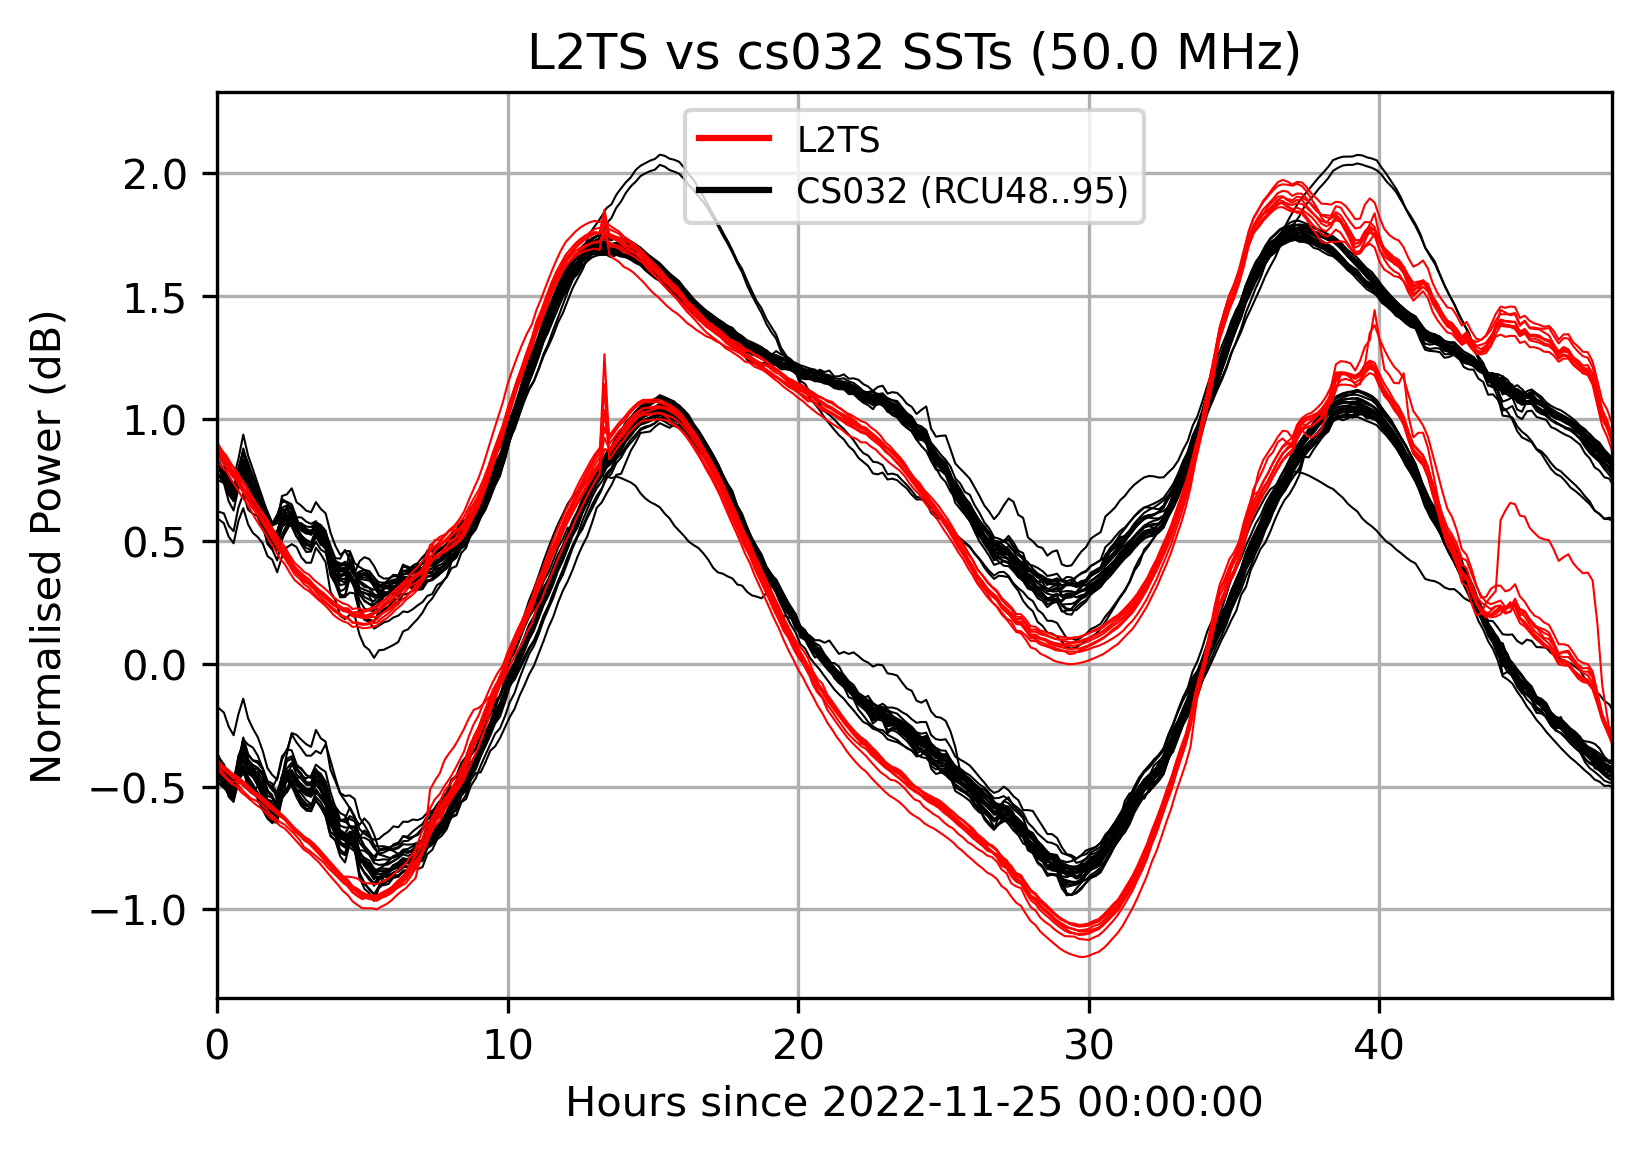

In [9]:
freq1=50;i1=np.argmin(np.abs(freqs-freq1))

plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i in [i1]:
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,::2,i])
    for rcu in range(Dn.shape[1]):
        plt.plot(L1_hour,Dn[:,rcu],'k-',linewidth=0.5)

    Dn=Pnorm(D[:,1::2,i])
    for rcu in range(Dn.shape[1]):
        if np.std(Dn[:,rcu])>1: continue;
        plt.plot(L1_hour,Dn[:,rcu]+1,'k-',linewidth=0.5)

    D2n=Pnorm(D2[:,::2,i])
    for l in range(9):
        plt.plot(L2_hour,D2n[:,l]+1,'r-',linewidth=0.5);

    D2n=Pnorm(D2[:,1::2,i])
    for l in range(9):
        plt.plot(L2_hour,D2n[:,l],'r-',linewidth=0.5);
plt.plot([],[],'r-',label='L2TS')
plt.plot([],[],'k-',label='CS032 (RCU48..95)')
plt.ylabel('Normalised Power (dB)')
plt.legend(fontsize='small')
plt.xlabel('Hours since 2022-11-25 00:00:00')
plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i])
plt.grid()
plt.xlim(0,48)

Text(0.5, 0, 'Hours since 2022-11-25 00:00:00')

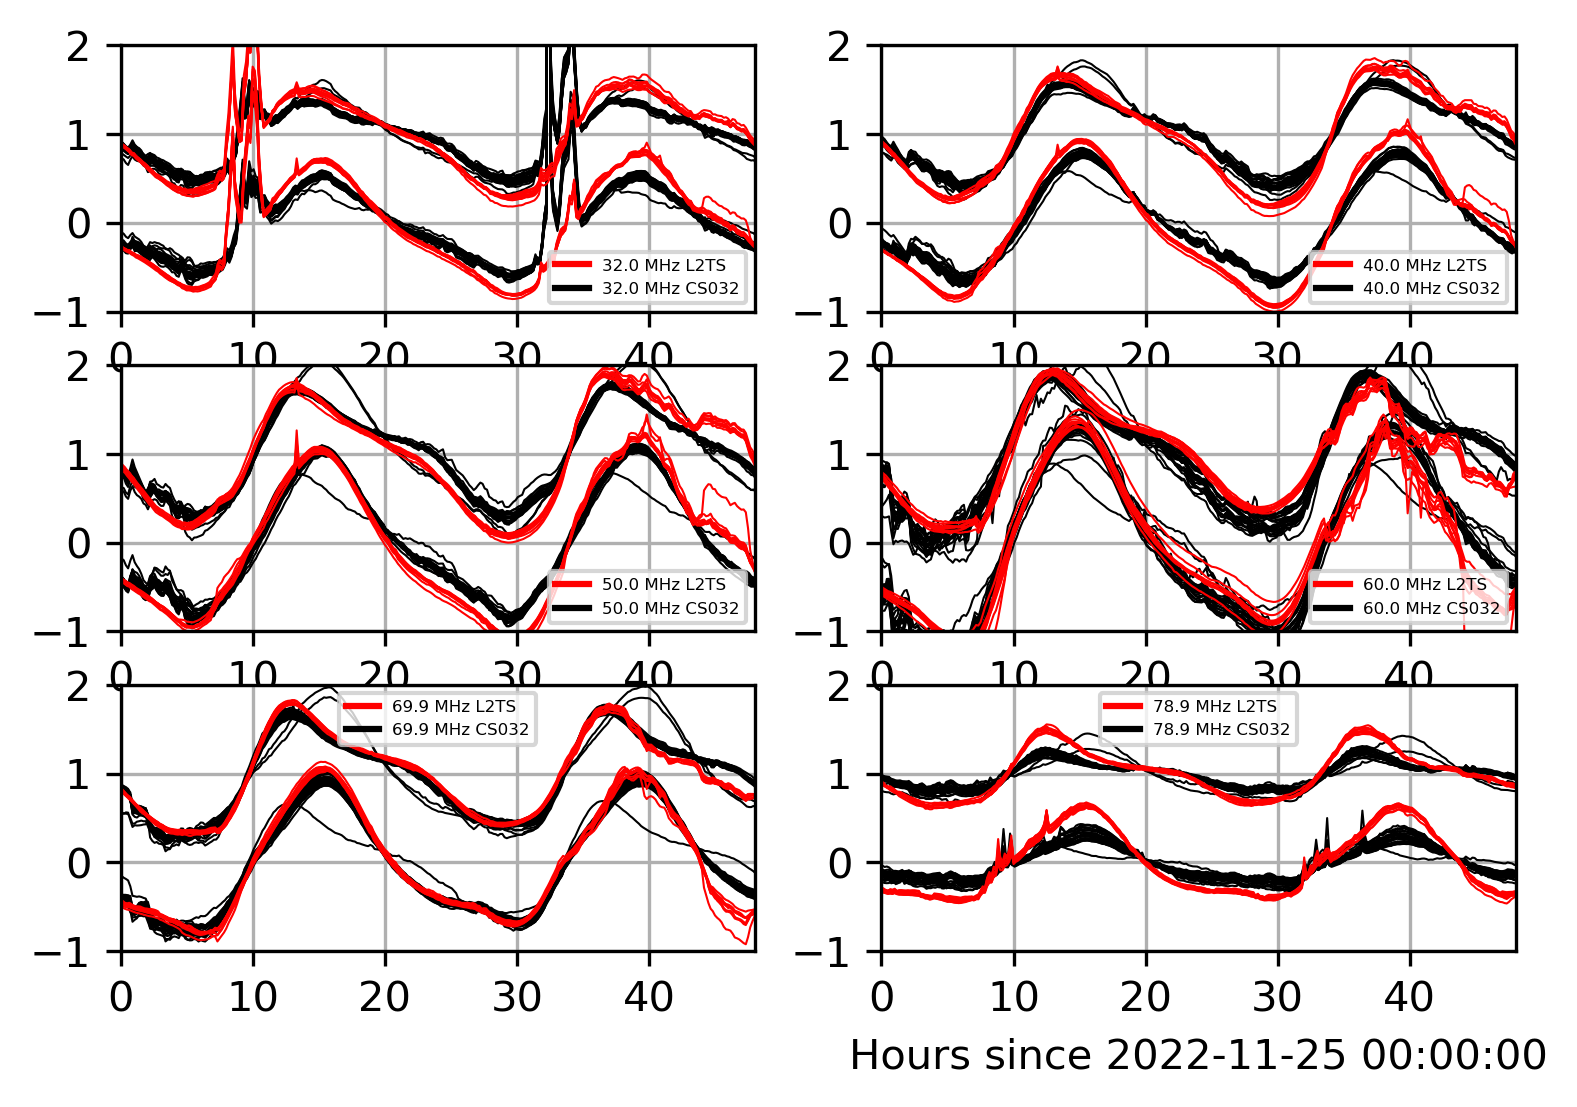

In [186]:
freqlist=[32,40,50,60,70,79]
plt.figure(dpi=300)
for x,freq1 in enumerate(freqlist):
    plt.subplot(3,2,x+1)
    i=np.argmin(np.abs(freqs-freq1))
#for i in range(6):
#    Pwr=np.min(10*np.log10(D[istart:istop,:,i]),axis=1)-GainADC
    Dn=Pnorm(D[:,::2,i])
    for rcu in range(Dn.shape[1]):
        plt.plot(L1_hour,Dn[:,rcu],'k-',linewidth=0.5)

    Dn=Pnorm(D[:,1::2,i])
    for rcu in range(Dn.shape[1]):
        if np.std(Dn[:,rcu])>1: continue;
        plt.plot(L1_hour,Dn[:,rcu]+1,'k-',linewidth=0.5)

    D2n=Pnorm(D2[:,::2,i])
    for l in range(9):
        plt.plot(L2_hour,D2n[:,l]+1,'r-',linewidth=0.5);

    D2n=Pnorm(D2[:,1::2,i])
    for l in range(9):
        plt.plot(L2_hour,D2n[:,l],'r-',linewidth=0.5);
    plt.xlim(0,48)
    plt.ylim(-1,2)
#    plt.title("%.1f MHz"%freqs[i])
    plt.grid()
    plt.plot([],[],'r-',label='%.1f MHz L2TS'%freqs[i])
    plt.plot([],[],'k-',label='%.1f MHz CS032'%freqs[i])
    plt.legend(fontsize=4)
#plt.ylabel('Normalised Power (dB)')
#plt.legend(fontsize='small')
plt.xlabel('Hours since 2022-11-25 00:00:00')
#plt.title("L2TS vs cs032 SSTs (%.1f MHz)"%freqs[i])


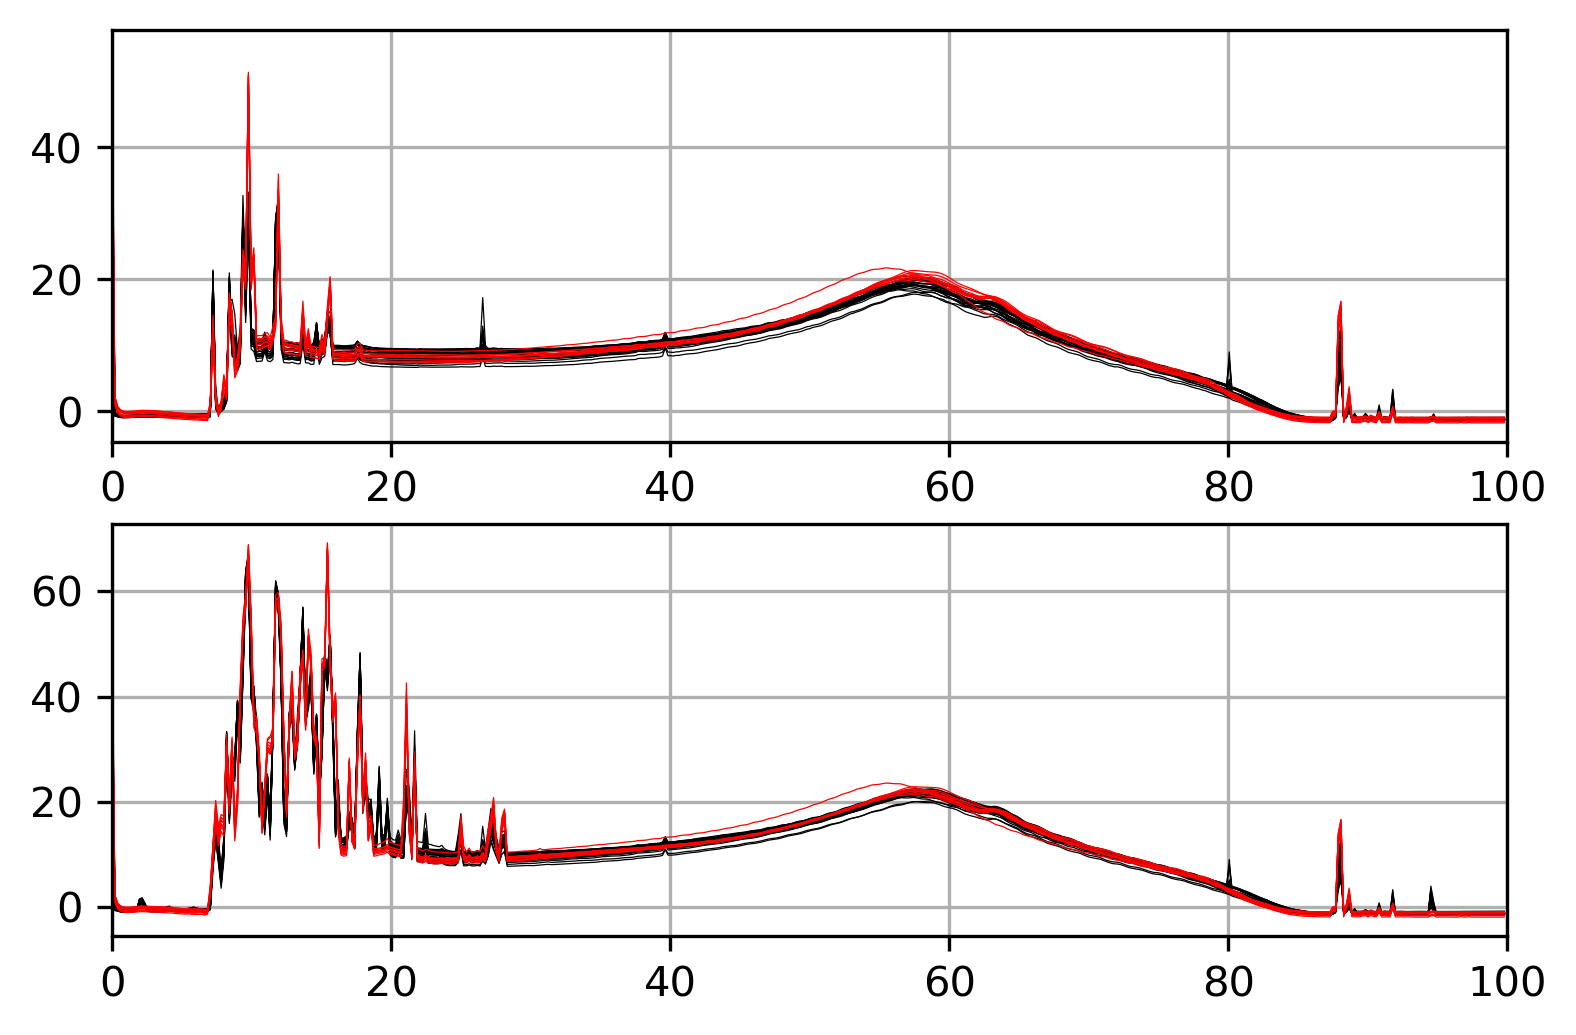

In [187]:
plt.figure(dpi=300)

hselect=5;
plt.subplot(2,1,1)
plt.xlim(0,100)
plt.grid()

ihr=np.argmin(np.abs(L1_hour-hselect))
plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

ihr=np.argmin(np.abs(L2_hour-hselect))
plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);

hselect=15;
plt.subplot(2,1,2)
plt.xlim(0,100)
plt.grid()
ihr=np.argmin(np.abs(L1_hour-hselect))
plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

ihr=np.argmin(np.abs(L2_hour-hselect))
plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);

Text(0.5, 0, 'Frequency (MHz)')

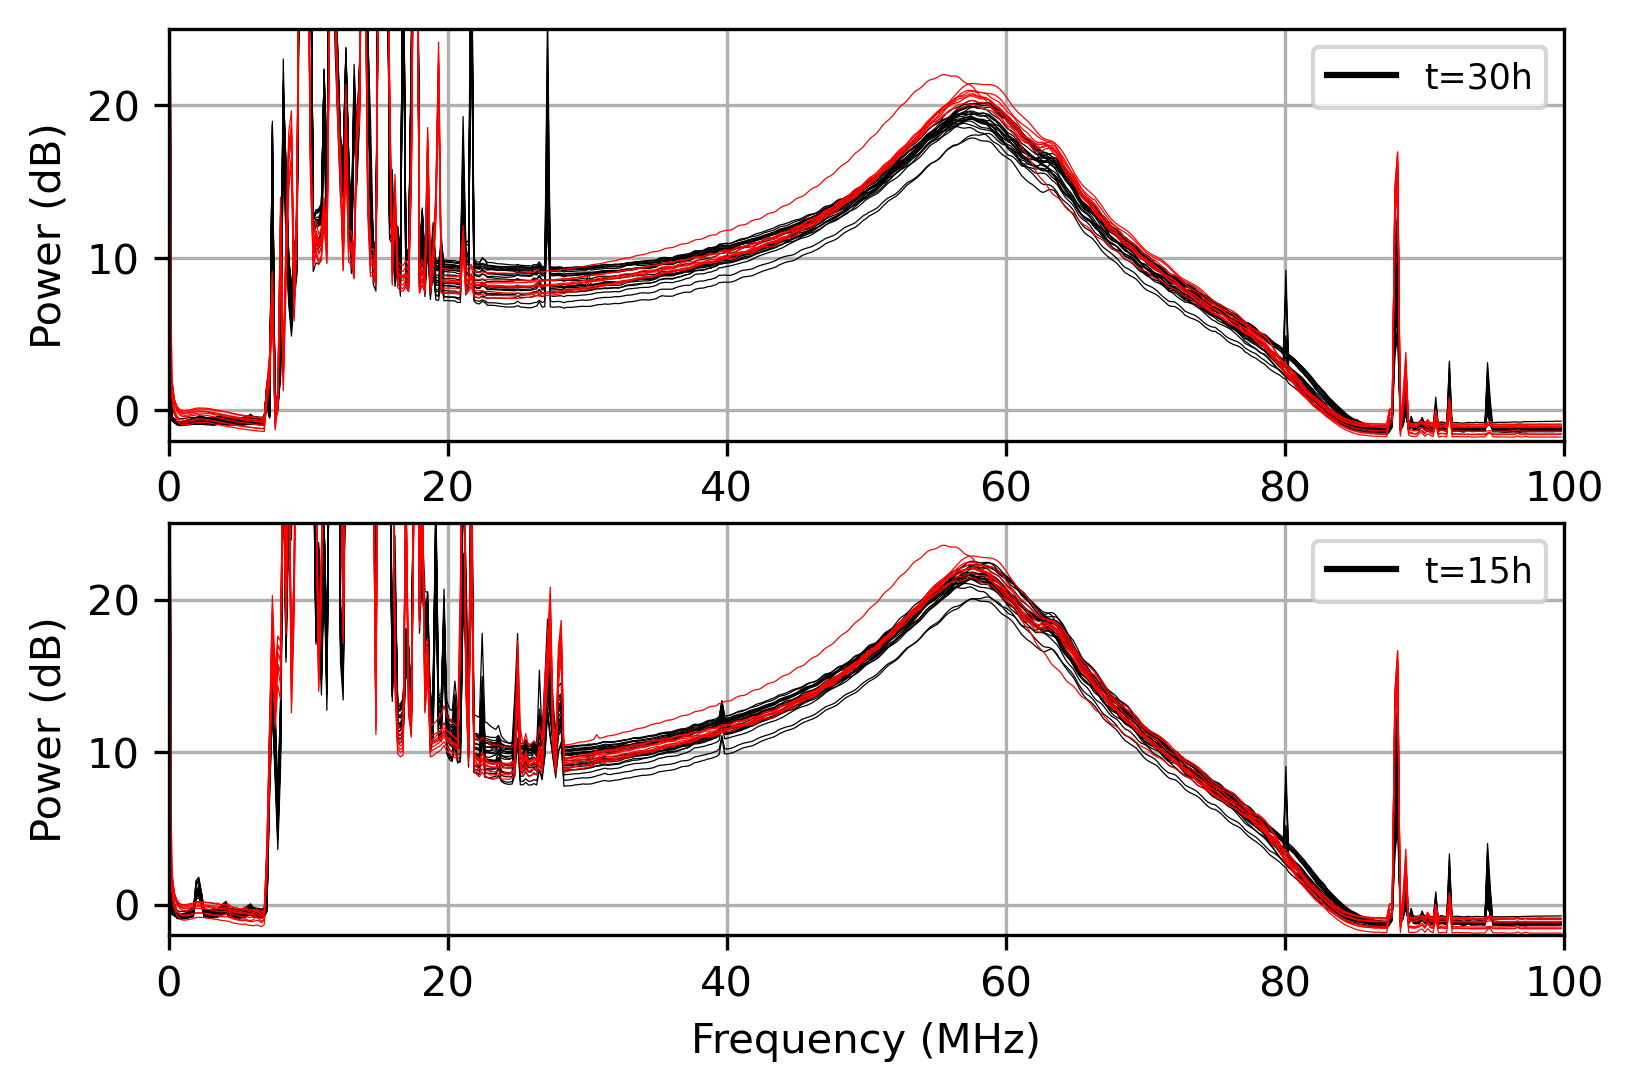

In [188]:
plt.figure(dpi=300)

hselect=[30,15];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
    plt.xlim(0,100)
    #plt.ylim(-5,75)
    plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")

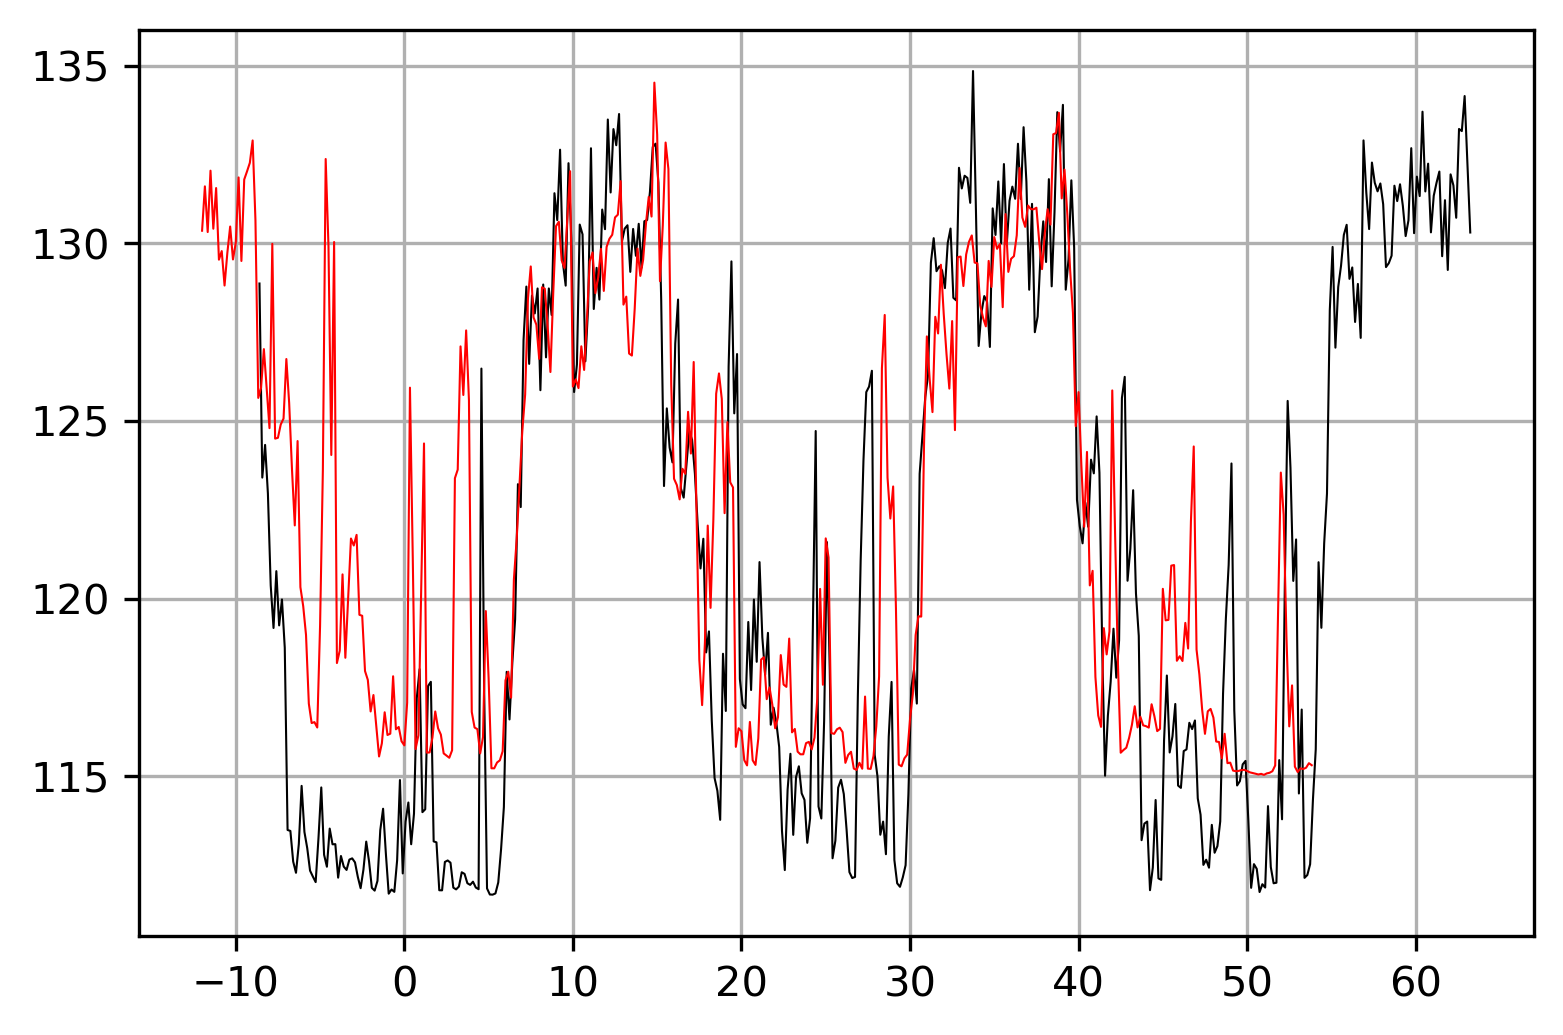

In [189]:
plt.figure(dpi=300)

P1=np.max( np.sum(D,axis=2) ,axis=1)
plt.plot(L1_hour,P2dB(P1),'k-',linewidth=0.5);

P2=np.max( np.sum(D2,axis=2) ,axis=1)
#P2=np.sum(D2,axis=2)
plt.plot(L2_hour,P2dB(P2)+7,'r-',linewidth=0.5);

#plt.ylim(125,135)
#plt.xlim(38,40)
#plt.xlim(50,52)
plt.grid()

Text(0.5, 0, 'Frequency (MHz)')

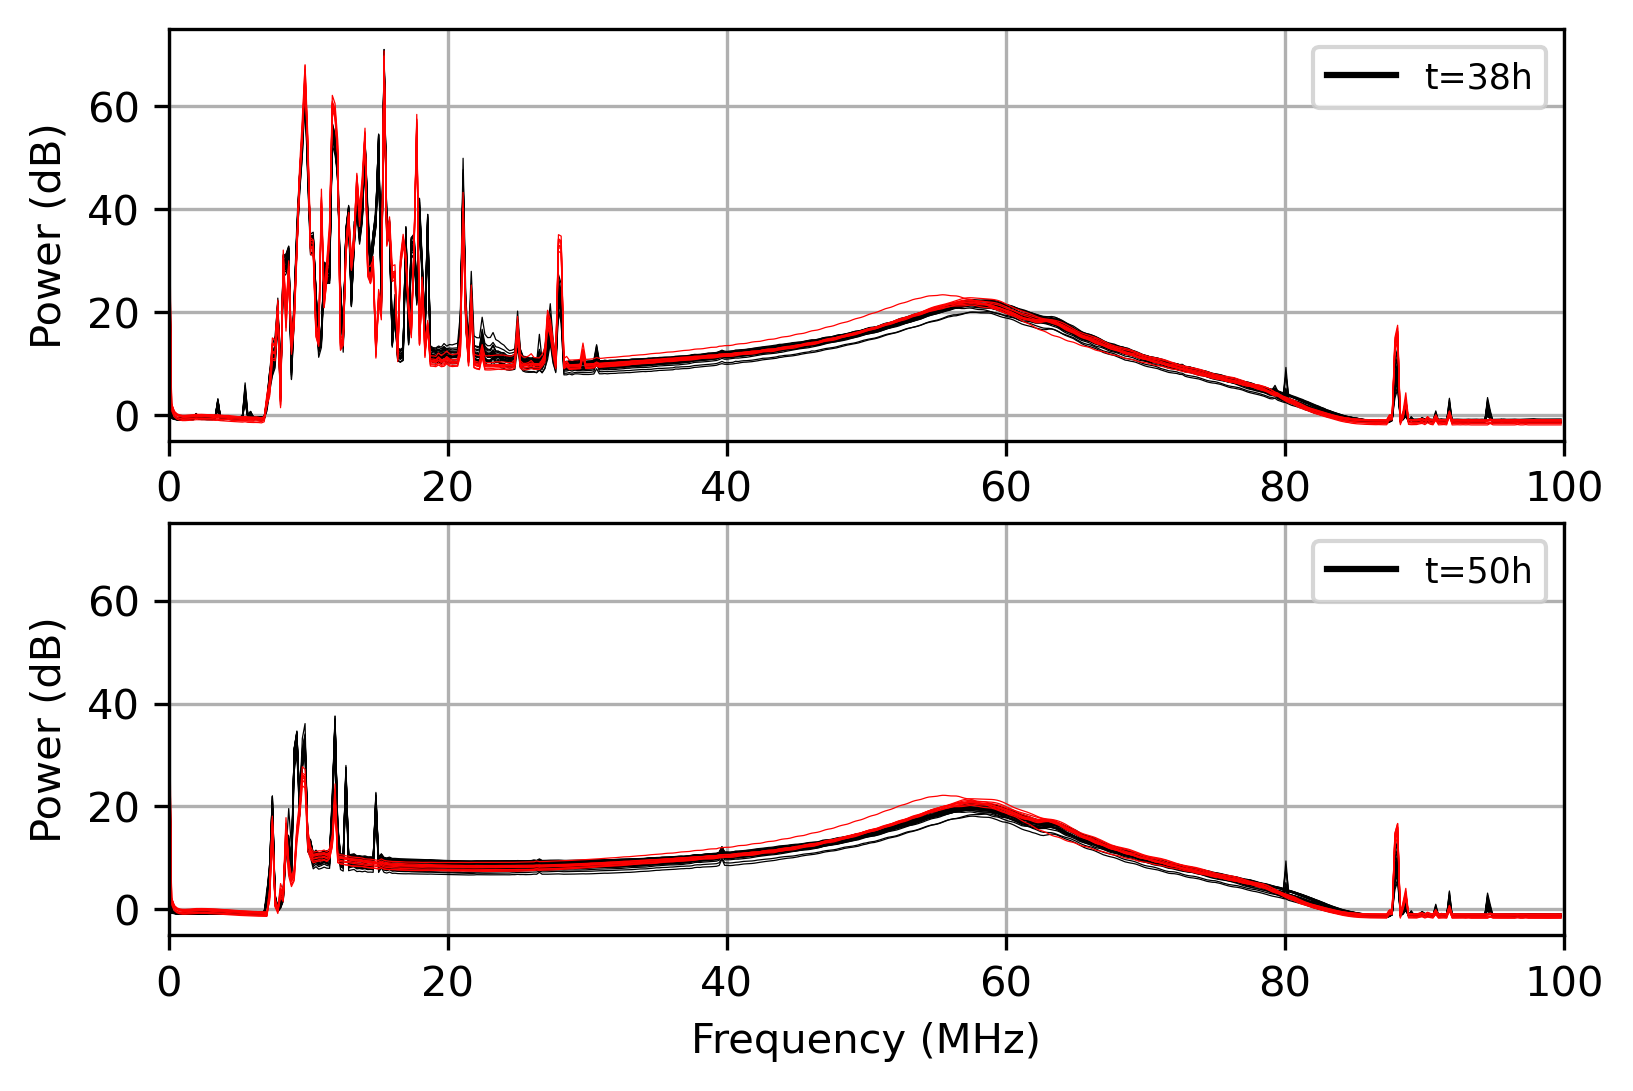

In [190]:
plt.figure(dpi=300)

hselect=[38.75,50.75];
for x,h1 in enumerate(hselect):
    plt.subplot(2,1,x+1)
    plt.xlim(0,100)
    plt.ylim(-5,75)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")


Text(0.5, 0, 'Frequency (MHz)')

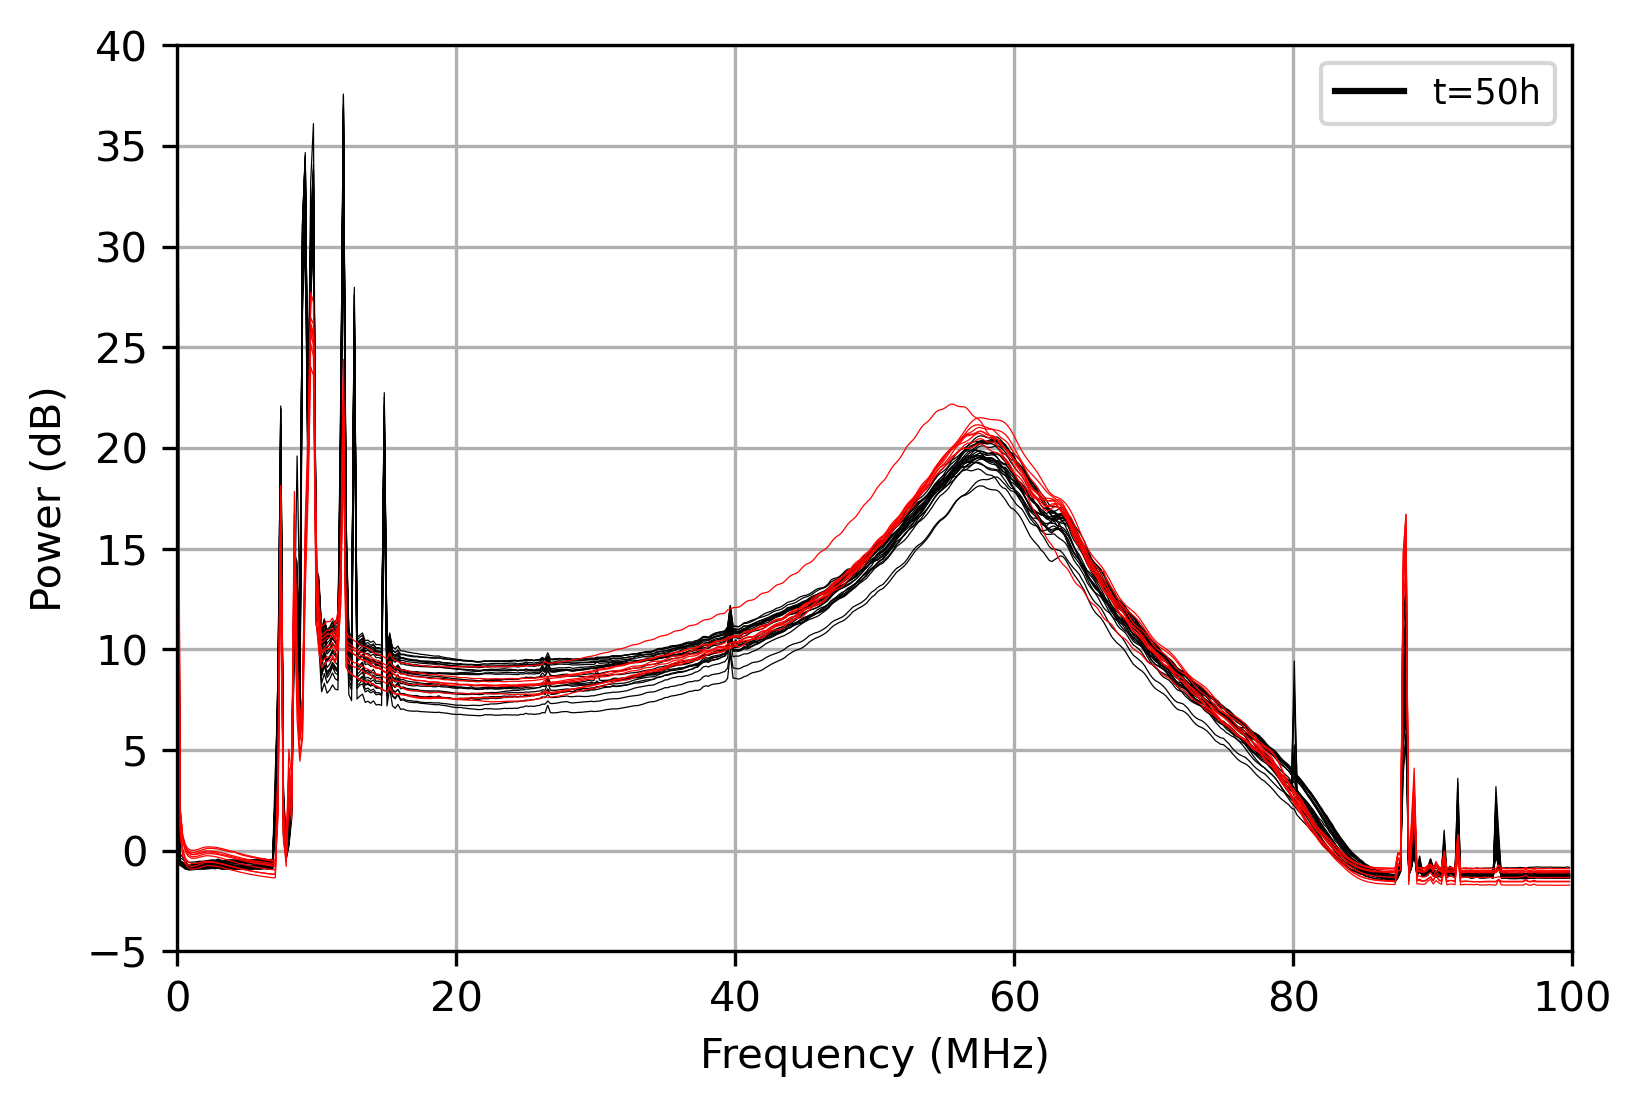

In [193]:
plt.figure(dpi=300)

hselect=[50.75];
for x,h1 in enumerate(hselect):
#    plt.subplot(2,1,x+1)
    plt.xlim(0,100)
    plt.ylim(-5,40)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    plt.plot(freqs,P2dB(D[ihr,::2,:]).T-60,'k-',linewidth=0.3);

    ihr=np.argmin(np.abs(L2_hour-h1))
    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
    plt.plot([],[],'k-',label='t=%ih'%h1)
    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")


[0.64653176 0.42431652 0.53573042 0.42484881 0.31004276 0.5314393
 0.30629077 1.07068146 0.44106014 0.41873074 0.37824872 0.36778123
 0.95234437 0.67933004 0.41969545 0.50000817 1.58149789 0.38091327
 0.25288576 0.67542099 0.34135055 0.59639631 0.3821282  0.65048314]
[0.44675976 0.49337681 0.23454525 0.33811974 0.81904065 0.2579093
 0.38708626 1.21177164 0.31819183]


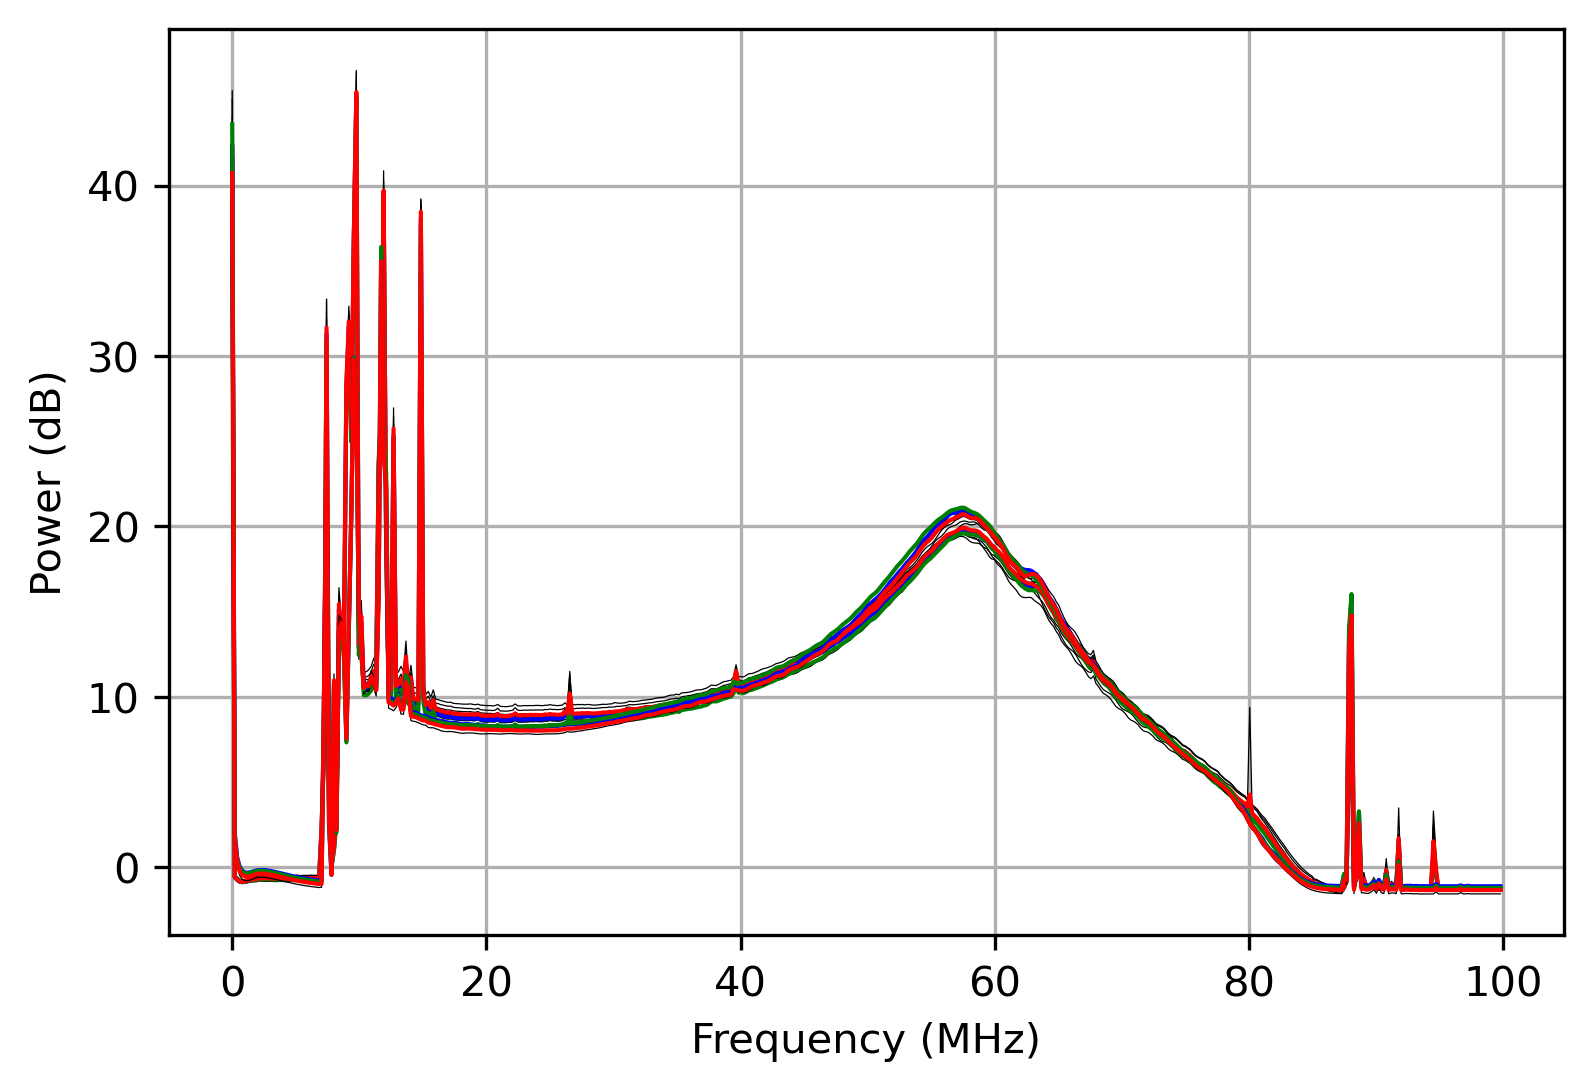

In [15]:
plt.figure(dpi=300)
def plotdatamean(data,cutoff,offset=-60,plotdata=True):
    dmean=np.percentile(data,50,axis=0)
    diff=np.std(data-dmean,axis=1)
    print(diff)
    data2=np.ma.array(data.T,mask=[diff<cutoff]*len(freqs)).T
    dmean2=np.mean(data2,axis=0)
    sum1=np.zeros_like(data[0])
    cnt1=0
    for d in data:
        diff=np.std(d-dmean)
#        print(diff)
        if diff<cutoff:
         sum1+=d
         cnt1+=1
         if plotdata:  plt.plot(freqs,d+offset,'k-',linewidth=0.3);
    sum1/=cnt1;
    plt.plot(freqs,dmean+offset,'b-',linewidth=1);
    plt.plot(freqs,dmean2+offset,'g-',linewidth=1);
    plt.plot(freqs,sum1+offset,'r-',linewidth=1);
    return sum1+offset
    
hselect=[50];
for x,h1 in enumerate(hselect):
#    plt.subplot(2,1,x+1)
    #plt.xlim(0,100)
    #plt.ylim(-5,40)
    #plt.ylim(-2,25)
    plt.grid()

    ihr=np.argmin(np.abs(L1_hour-h1))
    L1mean=plotdatamean(P2dB(D[ihr,::2,:]),0.4,offset=-60)

    ihr=np.argmin(np.abs(L2_hour-h1))
    data=P2dB(D2[ihr,::2,:])
    L2mean=plotdatamean(data,0.3,offset=-53)
#    plt.plot(freqs,P2dB(D2[ihr,::2,:]).T-53,'r-',linewidth=0.3);
#    plt.plot([],[],'k-',label='t=%ih'%h1)
#    plt.legend(fontsize='small')
    plt.ylabel("Power (dB)")
plt.xlabel("Frequency (MHz)")
np.savez("L1L2_10MHz",L1=L1mean,L2=L2mean,freq=freqs)